In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/csv/AAPL.csv", parse_dates=["Date"], index_col="Date").drop(columns=['Unnamed: 0'])
df

,Open,High,Low,Close,Vol
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800
2024-11-11,225.000000,225.699997,221.500000,224.229996,42005600
2024-11-12,224.550003,225.589996,223.360001,224.229996,40398300


In [26]:
class OHLC():
    def __init__(self, price_info):
        self.price_info = price_info

    def step1_choose_window_to_plot(self, start, end): 
        self.current_window = self.price_info.loc[start:end].copy()
        self.volume = self.current_window["Vol"].copy()
        self.current_window.drop(["Vol"], axis = 1, inplace = True)


    def step2_scale_window(self):
        _max = max(self.current_window.max())
        _min = min(self.current_window.min())
        self.current_window_scaled = self.current_window.to_numpy()
        self.current_window_scaled = np.round(((self.current_window_scaled - _min)/(_max - _min))*99)
        self.current_window_scaled = self.current_window_scaled.astype(int)
        self.current_window_scaled = 99 - self.current_window_scaled
        print(f"Len current window scaled: {len(self.current_window_scaled)}")

    def __scale_volume(self):
        _max = max(self.volume)
        _min = min(self.volume)
        self.scaled_vol = list(np.round(((self.volume - _min)/(_max - _min))*20))
        self.scaled_vol = [int(item) for item in self.scaled_vol]
#        self.scaled_vol = [20 - item for item in self.scaled_vol]
        print(f"VOLUME: {len(self.scaled_vol)}")

    def step3_create_image_object(self):
        self.width, self.height = len(self.current_window_scaled) * 3, 125
        print(f"width, height: {self.width}, {self.height}")
        self.image = Image.new("RGB", (self.width, self.height), "black")
        self.pixels = self.image.load()

    def step4_draw_price_on_image(self):
        self.candle_px_counter = None
        for x in range(self.width):
            if self.candle_px_counter == None:
                self.candle_px_counter = 1 

            idx = x // 3
            if idx >= len(self.current_window_scaled):
                break  # Prevent index out of range
            
            current_candle = self.current_window_scaled[idx]
            self.__draw_price_pixels(x, current_candle)

    def __draw_price_pixels(self, x, current_candle):
        open_px = current_candle[0]
        max_px = current_candle[1]
        min_px = current_candle[2]
        close_px = current_candle[3]

        # Draw Open
        if self.candle_px_counter == 1:
            self.pixels[x, open_px] = (255, 255, 255)
            self.candle_px_counter += 1
        # Draw Min Max line
        elif self.candle_px_counter == 2:
            start_body = min(max_px, min_px)
            end_body = max(max_px, min_px)
            for y in range(start_body, end_body + 1):
                self.pixels[x, y] = (255, 255, 255)
            self.candle_px_counter += 1
        # Draw Close
        elif self.candle_px_counter == 3:
            self.pixels[x, close_px - 1] = (255, 255, 255)
            self.candle_px_counter = None

    def step5_draw_volume(self):
        self.__scale_volume()
        for idx, x in enumerate(range(1, self.width, 3)):
            print(f"idx, x: {idx}, {x}")
            for y in range(self.height):
                if y > self.height - self.scaled_vol[idx]:
                    self.pixels[x, y] = (255, 255, 255)
        
        
            
        

In [27]:
prova = OHLC(df)
prova.step1_choose_window_to_plot("2010-01-04", "2010-01-20")
prova.step2_scale_window()
prova.step3_create_image_object()
prova.step4_draw_price_on_image()
prova.step5_draw_volume()

Len current window scaled: 12
width, height: 36, 125
VOLUME: 12
idx, x: 0, 1
idx, x: 1, 4
idx, x: 2, 7
idx, x: 3, 10
idx, x: 4, 13
idx, x: 5, 16
idx, x: 6, 19
idx, x: 7, 22
idx, x: 8, 25
idx, x: 9, 28
idx, x: 10, 31
idx, x: 11, 34


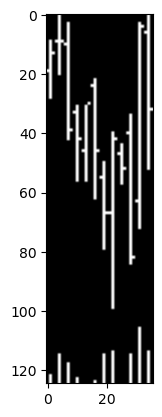

In [28]:
plt.imshow(prova.image)

In [29]:
prova.image.save("prova.png")

In [ ]:
prova.scaled_vol.iloc[0]

In [ ]:
for i in range(5, 10):
    print(i)